In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mramam167x0279","key":"725eb338a706250602b6297fdc689687"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables

 99% 1.40G/1.41G [00:08<00:00, 156MB/s]
100% 1.41G/1.41G [00:08<00:00, 174MB/s]


In [ ]:
! mkdir fruit_dataset

In [ ]:
! unzip fresh-and-stale-images-of-fruits-and-vegetables.zip -d fruit_dataset

Streaming output truncated to the last 5000 lines.
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.09 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.15 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.24 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.32 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.38 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.21 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.27 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.33 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.40 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12

In [ ]:
import os
import tensorflow as tf
os.listdir('fruit_dataset/')

['fresh_apple',
 'fresh_bitter_gourd',
 'fresh_tomato',
 'fresh_banana',
 'stale_banana',
 'fresh_orange',
 'stale_capsicum',
 'stale_orange',
 'stale_apple',
 'stale_bitter_gourd',
 'stale_tomato',
 'ImageLabels.txt',
 'fresh_capsicum']

In [ ]:
base_dir ='fruit_dataset/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
fresh_orange_dir = os.path.join(base_dir, 'fresh_orange')
fresh_tomato_dir = os.path.join(base_dir, 'fresh_tomato')
fresh_capsicum_dir = os.path.join(base_dir, 'fresh_capsicum')
fresh_banana_dir = os.path.join(base_dir, 'fresh_banana')
fresh_apple_dir = os.path.join(base_dir, 'fresh_apple')
fresh_bitter_gourd_dir = os.path.join(base_dir, 'fresh_bitter_gourd')
stale_orange_dir = os.path.join(base_dir, 'stale_orange')
stale_tomato_dir = os.path.join(base_dir, 'stale_tomato')
stale_capsicum_dir = os.path.join(base_dir, 'stale_capsicum')
stale_banana_dir = os.path.join(base_dir, 'stale_banana')
stale_apple_dir = os.path.join(base_dir, 'stale_apple')
stale_bitter_gourd_dir = os.path.join(base_dir, 'stale_bitter_gourd')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=20,
                    #width_shift_range=0.2,
                    #height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    #vertical_flip= True,
                    fill_mode='nearest',
                    validation_split=0.2
                    )


In [ ]:
train_generator = train_datagen.flow_from_directory(
                      base_dir, 
                      target_size= (150, 150),  
                      batch_size= 32,
                      shuffle = True,
                      subset = 'training',
                      class_mode= 'categorical' 
                      )

validation_generator = train_datagen.flow_from_directory(
                          base_dir, 
                          target_size= (150, 150),
                          batch_size= 32, 
                          shuffle = True,
                          subset = 'validation',
                          class_mode= 'categorical'
                          ) 

Found 11749 images belonging to 12 classes.
Found 2933 images belonging to 12 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

model = tf.keras.models.Sequential([
    #tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    #tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    #tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
   #tf.keras.layers.Dense(256, activation='relu'),
   #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 34, 34, 512)       590336    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 17, 17, 512)     

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= tf.optimizers.Adam(), 
              metrics= ['accuracy'])

In [ ]:
#setelah melebih 90% akurasi maka training akan berhenti
class myCallback(tf.keras
                 .callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.93):
            print("\nakurasi lebih besar dari 90%. maka training berhenti!") 
            self.model.stop_training = True 
 
callbacks = myCallback()

In [ ]:
history = model.fit(
          train_generator, 
          steps_per_epoch=25, 
          epochs=40, 
          validation_data= validation_generator,
          validation_steps=5,
          verbose=2,
          callbacks = [callbacks])

Epoch 1/40
25/25 - 11s - loss: 2.4521 - accuracy: 0.1600 - val_loss: 2.1056 - val_accuracy: 0.2562 - 11s/epoch - 450ms/step
Epoch 2/40
25/25 - 9s - loss: 1.9890 - accuracy: 0.3038 - val_loss: 1.9052 - val_accuracy: 0.3063 - 9s/epoch - 372ms/step
Epoch 3/40
25/25 - 9s - loss: 1.6373 - accuracy: 0.4050 - val_loss: 1.4720 - val_accuracy: 0.4938 - 9s/epoch - 372ms/step
Epoch 4/40
25/25 - 10s - loss: 1.2751 - accuracy: 0.5437 - val_loss: 1.1822 - val_accuracy: 0.5312 - 10s/epoch - 403ms/step
Epoch 5/40
25/25 - 9s - loss: 0.9805 - accuracy: 0.6575 - val_loss: 1.2023 - val_accuracy: 0.6125 - 9s/epoch - 373ms/step
Epoch 6/40
25/25 - 9s - loss: 0.7778 - accuracy: 0.7175 - val_loss: 0.8435 - val_accuracy: 0.6750 - 9s/epoch - 372ms/step
Epoch 7/40
25/25 - 10s - loss: 0.6972 - accuracy: 0.7625 - val_loss: 0.7924 - val_accuracy: 0.6687 - 10s/epoch - 403ms/step
Epoch 8/40
25/25 - 9s - loss: 0.6740 - accuracy: 0.7500 - val_loss: 0.6862 - val_accuracy: 0.7250 - 9s/epoch - 374ms/step
Epoch 9/40
25/25 -

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
%matplotlib inline

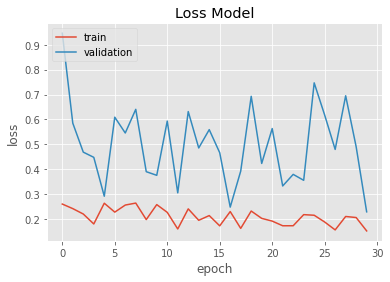

In [ ]:
plt.style.use("ggplot")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

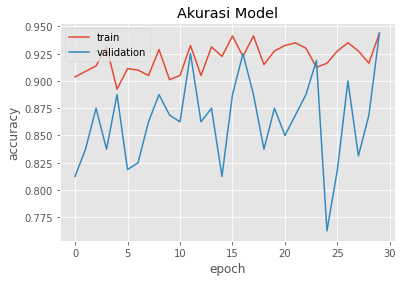

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

Saving apple1.jpg to apple1 (2).jpg
1/1 [==============================] - 0s 17ms/step
apple1.jpg
fresh_orange


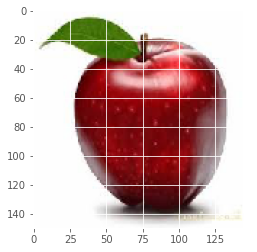

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10) 
  output_class = np.argmax(classes) 
  print(fn)
  if classes[0,0]!=0:
   print('fresh_apple')
  elif classes[0,1]!=0:
    print('fresh_banana')
  elif classes[0,2]!=0:
    print('fresh_bitter_gourd')
  elif classes[0,3]!=0:
    print('fresh_capsicum')
  elif classes[0,4]!=0:
    print('fresh_orange')
  elif classes[0,5]!=0:
    print('fresh_tomato')
  elif classes[0,6]!=0:
   print('stale_apple')
  elif classes[0,7]!=0:
    print('stale_banana')
  elif classes[0,8]!=0:
    print('stale_bitter_gourd')
  elif classes[0,9]!=0:
    print('stale_capsicum')
  elif classes[0,10]!=0:
    print('stale_orange')
  else:
   print('stale_tomato')